# HEART DISEASE PREDICTION

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
from sklearn.metrics import accuracy_score

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [47]:
df=pd.read_csv(r'C:\Users\Abhishek\Downloads\heart.csv')

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [13]:
df.shape

(303, 14)

In [14]:
df.size

4242

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
#visualization

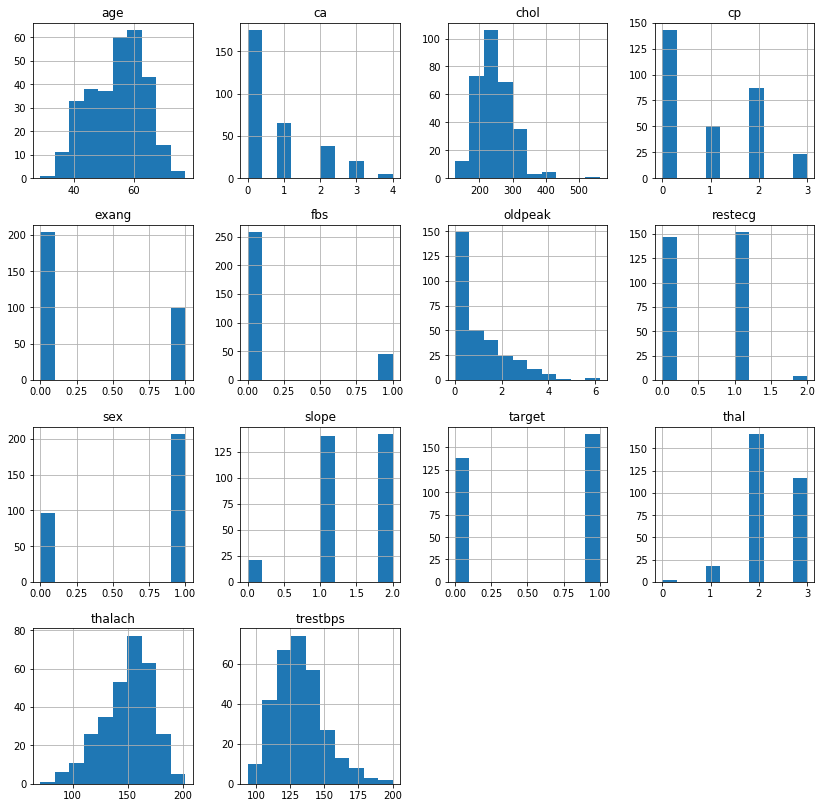

In [20]:
df.hist(figsize=(14,14))
plt.show()

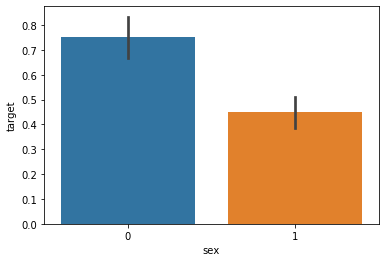

In [21]:
sns.barplot(df['sex'],df['target'])
plt.show()

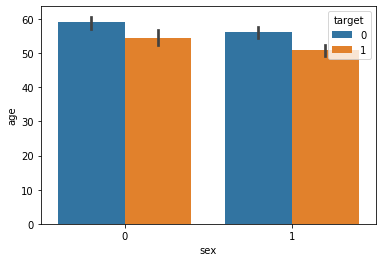

In [22]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [23]:
px.bar(df,df['sex'],df['target'])

In [4]:
numeric_coloumns=['trestbps','chol','age','oldpeak','thalach']

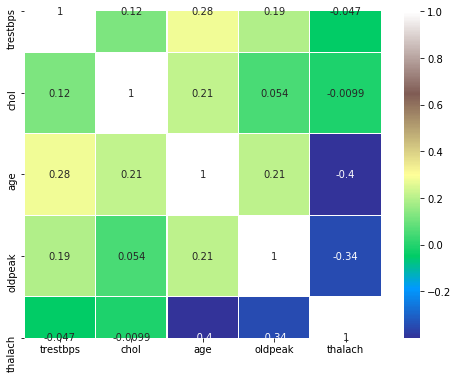

In [33]:
sns.heatmap(df[numeric_coloumns].corr(),annot=True,cmap='terrain',lw=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

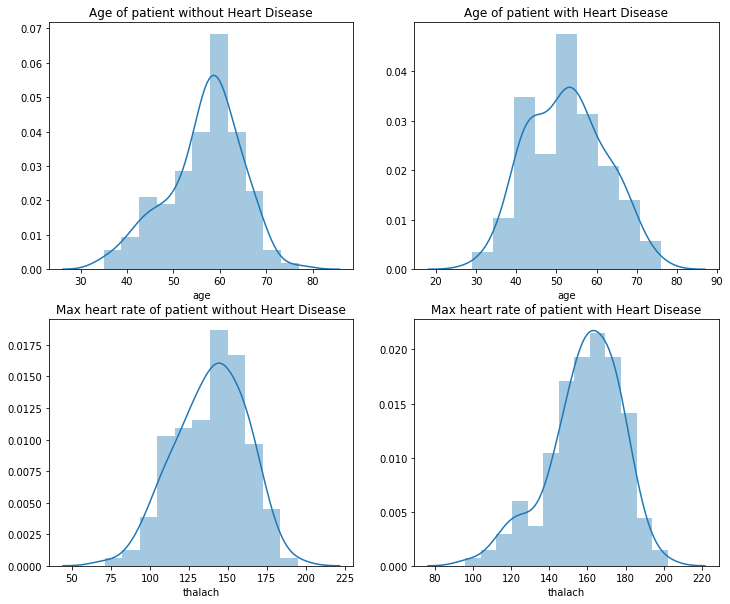

In [9]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patient without Heart Disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patient with Heart Disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Max heart rate of patient without Heart Disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Max heart rate of patient with Heart Disease')

plt.show()


In [48]:
x,y = df.iloc[:,:-1],df['target']

In [13]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [19]:
X_train.shape

(212, 13)

In [20]:
X_test.shape

(91, 13)

In [ ]:
#decision tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt =  DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
prediction=dt.predict(X_test)

In [38]:
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [39]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [40]:
accuracy_dt= accuracy_score(y_test,prediction)*100

In [41]:
accuracy_dt

74.72527472527473

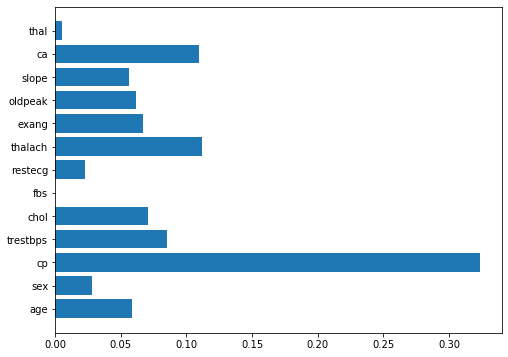

In [12]:
def plot_feature_imp(model):
    plt.figure(figsize=(8,6))
    n_features=13
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),x)
    
plot_feature_imp(dt)

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [42]:
custom_data=np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [43]:
custom_prediction=dt.predict(custom_data)

In [44]:
custom_prediction

array([1], dtype=int64)

In [ ]:
#KNN Algorithm

In [72]:
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
prediction_knn=knn.predict(X_test)

In [74]:
accuracy_knn= accuracy_score(y_test,prediction_knn)*100

In [75]:
accuracy_knn

63.73626373626373

In [64]:
custom_knn = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [65]:
cust_pred_knn=knn.predict(custom_knn)

In [66]:
cust_pred_knn

array([1], dtype=int64)